# 1. Neighborhoods and Connectivity

In [ ]:
# download the sample image
!wget --no-check-certificate \
    https://drive.google.com/uc?id=15ywep3yQV_hb5J1n4vVkS0nT5XdJhJ-B -O connectivity.png

--2024-10-25 15:41:27--  https://drive.google.com/uc?id=15ywep3yQV_hb5J1n4vVkS0nT5XdJhJ-B
Resolving drive.google.com (drive.google.com)... 74.125.132.101, 74.125.132.139, 74.125.132.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.132.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=15ywep3yQV_hb5J1n4vVkS0nT5XdJhJ-B [following]
--2024-10-25 15:41:27--  https://drive.usercontent.google.com/download?id=15ywep3yQV_hb5J1n4vVkS0nT5XdJhJ-B
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.184.132, 2607:f8b0:4001:c66::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.184.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2136 (2.1K) [image/png]
Saving to: ‘connectivity.png’

connectivity.png    100%[===================>]   2.09K  --.-KB/s    in 0s      

2024-10-25 15:41:30 (13.9 MB/s) - ‘connectivi

In [ ]:
# importing necessary packages
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
%matplotlib inline
from matplotlib import pyplot as plt

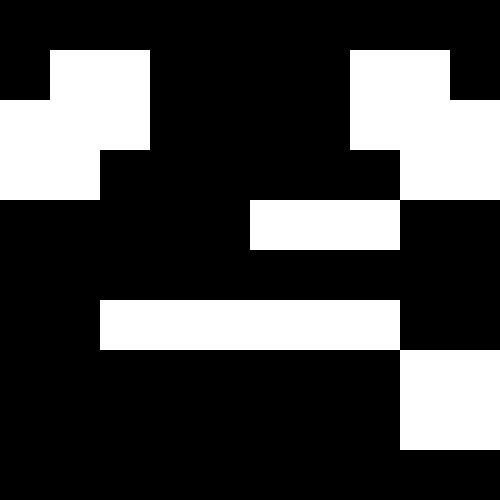

Image height= 500 px, and width= 500 px and data type: uint8


In [ ]:
# load and display the sample image
image = cv2.imread('connectivity.png', cv2.IMREAD_GRAYSCALE)
cv2_imshow(image)

height, width = image.shape
print("Image height=", height, "px, and width=", width, "px and data type:", image.dtype)

In [ ]:
num_labels_4, labels_4 = cv2.connectedComponents(image, connectivity=4)
output_image_4 = np.zeros((labels_4.shape[0], labels_4.shape[1], 3), dtype=np.uint8)

num_labels_8, labels_8 = cv2.connectedComponents(image, connectivity=8)
output_image_8 = np.zeros((labels_8.shape[0], labels_8.shape[1], 3), dtype=np.uint8)

In [ ]:
colors_4 = np.random.randint(0, 255, size=(num_labels_4, 3))


for label in range(1, num_labels_4):
    output_image_4[labels_4 == label] = colors_4[label]


colors_8 = np.random.randint(0, 255, size=(num_labels_8, 3))


for label in range(1, num_labels_8):
    output_image_8[labels_8 == label] = colors_8[label]

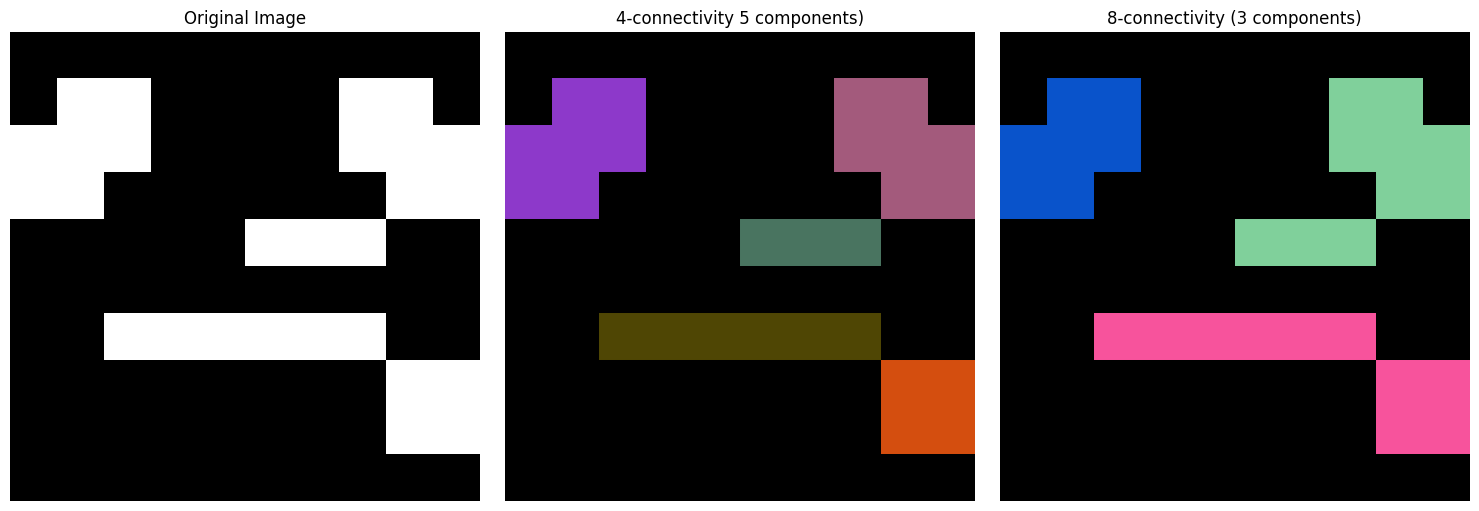

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(output_image_4, cmap='gray')
axes[1].set_title('4-connectivity ' + str(num_labels_4-1) + ' components)')
axes[1].axis('off')

axes[2].imshow(output_image_8, cmap='gray')
axes[2].set_title('8-connectivity (' + str(num_labels_8-1) + ' components)')
axes[2].axis('off')


plt.tight_layout()
plt.show()

# 2. Component labeling

In [ ]:
# Download the test image and utils files
!wget --no-check-certificate \
    https://drive.google.com/uc?id=1qepw3naXQxDQnLpMDH7R_a9yssGG50tE -O ocr.png

--2024-10-15 07:00:56--  https://drive.google.com/uc?id=1qepw3naXQxDQnLpMDH7R_a9yssGG50tE
Resolving drive.google.com (drive.google.com)... 142.250.31.101, 142.250.31.139, 142.250.31.113, ...
Connecting to drive.google.com (drive.google.com)|142.250.31.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1qepw3naXQxDQnLpMDH7R_a9yssGG50tE [following]
--2024-10-15 07:00:56--  https://drive.usercontent.google.com/download?id=1qepw3naXQxDQnLpMDH7R_a9yssGG50tE
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.179.132, 2607:f8b0:4004:c1f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.179.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6218 (6.1K) [image/png]
Saving to: ‘ocr.png’

ocr.png             100%[===================>]   6.07K  --.-KB/s    in 0s      

2024-10-15 07:00:58 (48.3 MB/s) - ‘ocr.png’ saved [621

Image height= 500 px, and width= 500 px and data type: uint8


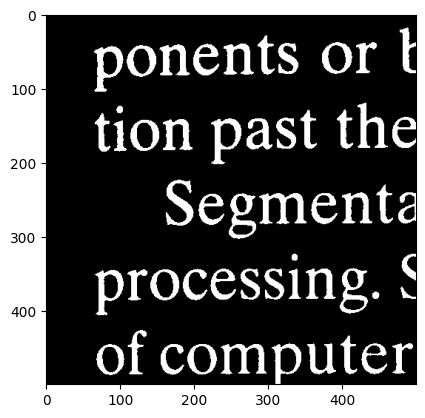

In [ ]:
input=cv2.imread('ocr.png',cv2.IMREAD_GRAYSCALE)
# pring image properties
height, width = input.shape
print("Image height=", height, "px, and width=", width, "px and data type:", input.dtype)

plt.imshow(input, cmap='gray')

In [ ]:
# Apply the Component analysis function with 4-connectivity
analysis = cv2.connectedComponentsWithStats(input, 4, cv2.CV_32S)

# Returns:
# 1) The bounding box of the connected component
# 2) The area (in pixels) of the component
# 3) The centroid/center (x, y)-coordinates of the component
(totalLabels, label_ids, values, centroid) = analysis
print(totalLabels)      # total number of CCs
print(values)           # array of stats
print(label_ids.shape)  # image with the labels_ids in place of pixel values

55
[[     0      0    500    500 216268]
 [   478     18     22     62    611]
 [   286     29     23     53    505]
 [   313     39     28     42    590]
 [   373     38     41     43    730]
 [   419     38     28     42    492]
 [   153     41     41     42    852]
 [   199     40     35     43    693]
 [   240     40     41     42    840]
 [    65     43     40     62   1016]
 [   109     42     40     43    753]
 [   421    120     41     61    968]
 [    95    124      9     10     73]
 [   343    129     23     53    485]
 [   393    129     22     53    486]
 [    66    134     21     52    475]
 [   468    139     32     42    603]
 [   223    141     41     62    998]
 [   271    141     35     42    720]
 [   311    140     27     42    558]
 [   114    143     39     42    717]
 [   158    142     40     42    836]
 [    91    144     18     42    376]
 [   162    224     38     62    981]
 [   446    230     23     53    467]
 [   400    241     41     42    789]
 [   476 

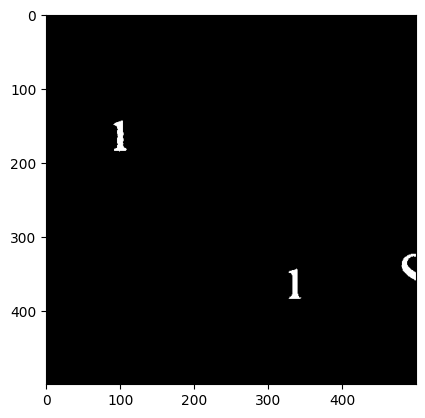

In [ ]:
# Initialize a new image to
# store all the output components
output = np.zeros(input.shape, dtype="uint8")

# Loop through each component
for i in range(1, totalLabels):

      # Area of the component
    area = values[i, cv2.CC_STAT_AREA]

    if (area > 140) and (area < 400):

        # Create a new array to show individual component
        component = np.zeros(input.shape, dtype="uint8")
        componentMask = (label_ids == i).astype("uint8") * 255

        # Apply the mask using the bitwise operator
        component = cv2.bitwise_or(component,componentMask)
        output = cv2.bitwise_or(output, componentMask)

        # Show the final images
        plt.imshow(output, cmap='gray')

# 3. Dilation example to fill gaps in the text

In [ ]:
# download the sample image
!wget --no-check-certificate \
    https://drive.google.com/uc?id=1gN2kK5Bpgi4YB4O7anQQJ6SUWcUT2kM8 -O text_gaps.tif

--2024-10-15 07:01:10--  https://drive.google.com/uc?id=1gN2kK5Bpgi4YB4O7anQQJ6SUWcUT2kM8
Resolving drive.google.com (drive.google.com)... 142.251.16.100, 142.251.16.138, 142.251.16.101, ...
Connecting to drive.google.com (drive.google.com)|142.251.16.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1gN2kK5Bpgi4YB4O7anQQJ6SUWcUT2kM8 [following]
--2024-10-15 07:01:10--  https://drive.usercontent.google.com/download?id=1gN2kK5Bpgi4YB4O7anQQJ6SUWcUT2kM8
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.179.132, 2607:f8b0:4004:c1f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.179.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28830 (28K) [application/octet-stream]
Saving to: ‘text_gaps.tif’

text_gaps.tif       100%[===================>]  28.15K  --.-KB/s    in 0.002s  

2024-10-15 07:01:13 (13.8 MB/s) -

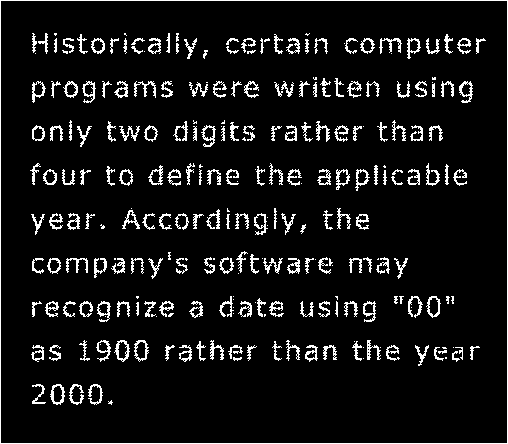

Image height= 444 px, and width= 508 px and data type: uint8


In [ ]:
# load and display the sample image
image = cv2.imread('text_gaps.tif', cv2.IMREAD_GRAYSCALE)
cv2_imshow(image)

height, width = image.shape
print("Image height=", height, "px, and width=", width, "px and data type:", image.dtype)

In [ ]:
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype=np.uint8)
dilated_image = cv2.dilate(image, kernel, iterations=1)

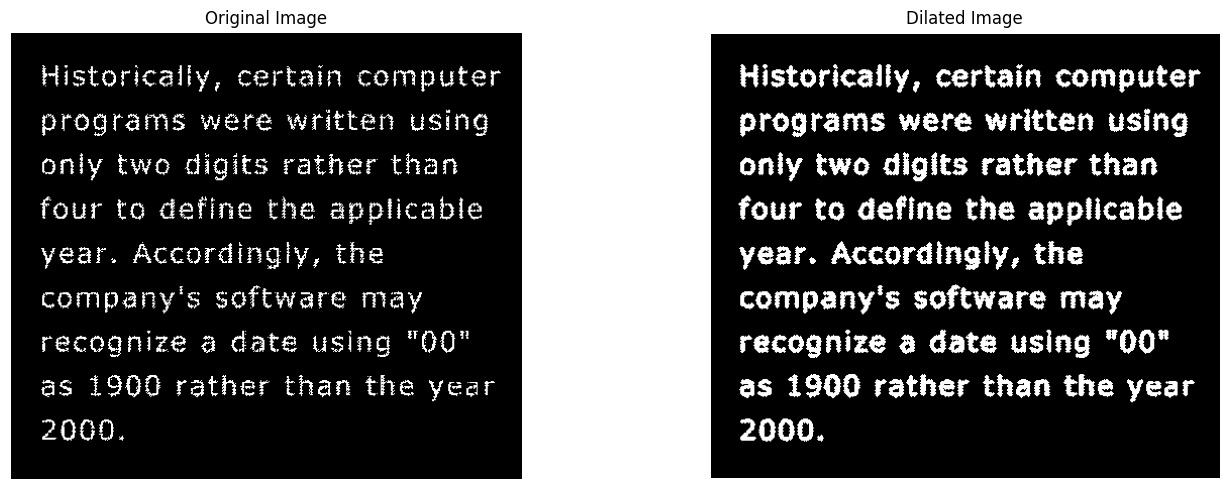

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(dilated_image, cmap='gray')
axes[1].set_title('Dilated Image')
axes[1].axis('off')



plt.tight_layout()
plt.show()

# 4. Erosion example to remove image components

In [ ]:
# download the sample image
!wget --no-check-certificate \
    https://drive.google.com/uc?id=1pTYbXiOpBLO_qhGzo3xZ2O5CqKqLxgbh -O wirebond_mask.tif

--2024-10-15 07:01:33--  https://drive.google.com/uc?id=1pTYbXiOpBLO_qhGzo3xZ2O5CqKqLxgbh
Resolving drive.google.com (drive.google.com)... 142.251.16.100, 142.251.16.138, 142.251.16.101, ...
Connecting to drive.google.com (drive.google.com)|142.251.16.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1pTYbXiOpBLO_qhGzo3xZ2O5CqKqLxgbh [following]
--2024-10-15 07:01:33--  https://drive.usercontent.google.com/download?id=1pTYbXiOpBLO_qhGzo3xZ2O5CqKqLxgbh
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.179.132, 2607:f8b0:4004:c1f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.179.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30092 (29K) [application/octet-stream]
Saving to: ‘wirebond_mask.tif’

wirebond_mask.tif   100%[===================>]  29.39K  --.-KB/s    in 0.001s  

2024-10-15 07:01:35 (21.8 MB/

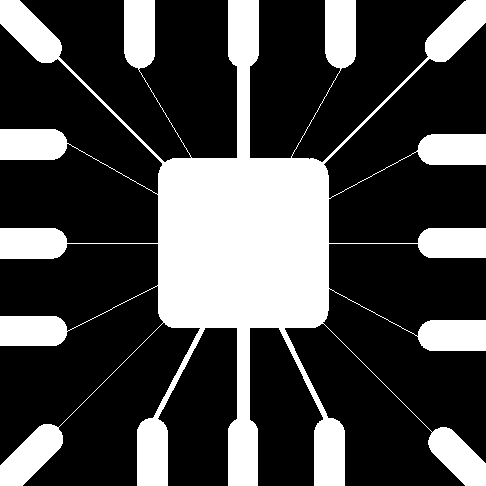

Image height= 486 px, and width= 486 px and data type: uint8


In [ ]:
# load and display the sample image
image = cv2.imread('wirebond_mask.tif', cv2.IMREAD_GRAYSCALE)
cv2_imshow(image)

height, width = image.shape
print("Image height=", height, "px, and width=", width, "px and data type:", image.dtype)

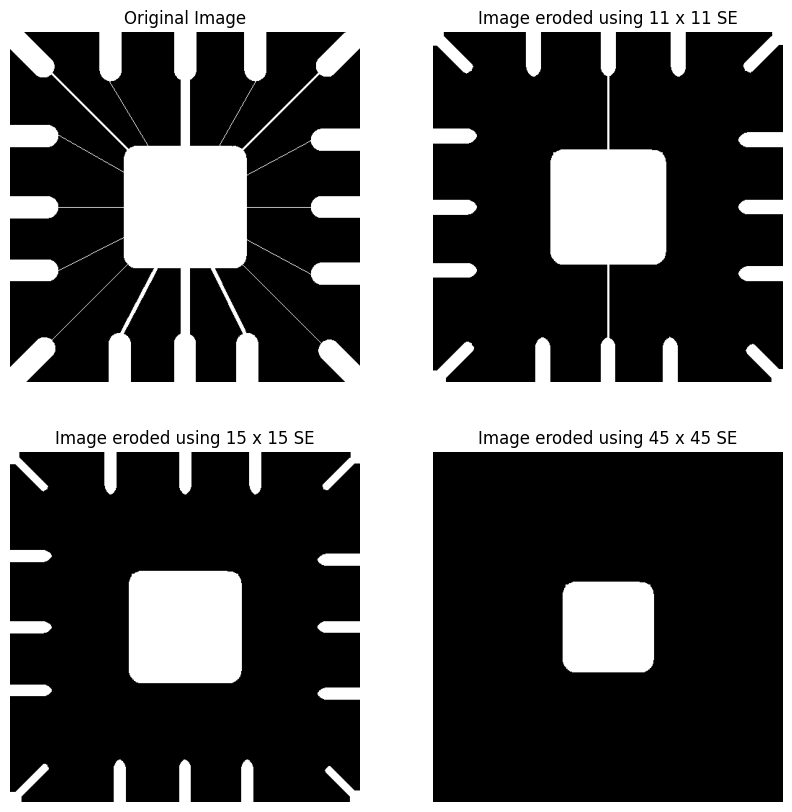

In [ ]:
kernel_11 = np.ones((11, 11), np.uint8)
kernel_15 = np.ones((15, 15), np.uint8)
kernel_45 = np.ones((45, 45), np.uint8)


eroded_image_11 = cv2.erode(image, kernel_11, iterations=1)
eroded_image_15 = cv2.erode(image, kernel_15, iterations=1)
eroded_image_45 = cv2.erode(image, kernel_45, iterations=1)


fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title("Original Image")
axs[0, 1].imshow(eroded_image_11, cmap='gray')
axs[0, 1].set_title("Image eroded using 11 x 11 SE")
axs[1, 0].imshow(eroded_image_15, cmap='gray')
axs[1, 0].set_title("Image eroded using 15 x 15 SE")
axs[1, 1].imshow(eroded_image_45, cmap='gray')
axs[1, 1].set_title("Image eroded using 45 x 45 SE")

for ax in axs.flat:
    ax.axis('off')

# 5. Boundry Extraction using Erosion


In [ ]:
# download the sample image
!wget --no-check-certificate \
    https://drive.google.com/uc?id=14A3UpuRecWacSDBfFAJMzu6FVDcMonWH -O licoln_from_penny.tif

--2024-10-15 07:01:45--  https://drive.google.com/uc?id=14A3UpuRecWacSDBfFAJMzu6FVDcMonWH
Resolving drive.google.com (drive.google.com)... 142.251.163.113, 142.251.163.101, 142.251.163.139, ...
Connecting to drive.google.com (drive.google.com)|142.251.163.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=14A3UpuRecWacSDBfFAJMzu6FVDcMonWH [following]
--2024-10-15 07:01:45--  https://drive.usercontent.google.com/download?id=14A3UpuRecWacSDBfFAJMzu6FVDcMonWH
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.179.132, 2607:f8b0:4004:c1f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.179.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1910 (1.9K) [application/octet-stream]
Saving to: ‘licoln_from_penny.tif’

licoln_from_penny.t 100%[===================>]   1.87K  --.-KB/s    in 0s      

2024-10-15 07:01:48 (

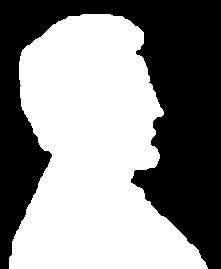

Image height= 269 px, and width= 221 px and data type: uint8


In [ ]:
# load and display the sample image
image = cv2.imread('licoln_from_penny.tif', cv2.IMREAD_GRAYSCALE)
cv2_imshow(image)

height, width = image.shape
print("Image height=", height, "px, and width=", width, "px and data type:", image.dtype)

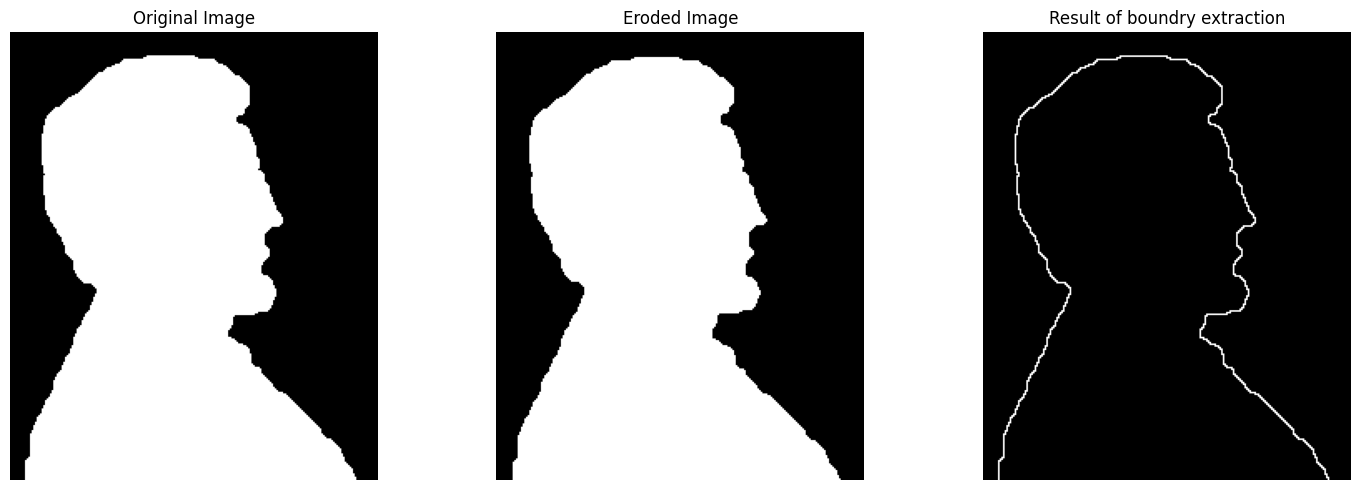

In [ ]:
kernel = np.ones((3, 3), np.uint8)

eroded_image = cv2.erode(image, kernel, iterations=1)

boundary_image = cv2.subtract(image, eroded_image)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(eroded_image, cmap='gray')
axes[1].set_title('Eroded Image')
axes[1].axis('off')

axes[2].imshow(boundary_image, cmap='gray')
axes[2].set_title('Result of boundry extraction')
axes[2].axis('off')


plt.tight_layout()
plt.show()

# 6. Opening Example

In [ ]:
# download the sample image
!wget --no-check-certificate \
    https://drive.google.com/uc?id=1ZKh9jszupqBb563vxGL4CJV9ri6Sw5J4 -O text_image.tif

--2024-10-15 07:01:56--  https://drive.google.com/uc?id=1ZKh9jszupqBb563vxGL4CJV9ri6Sw5J4
Resolving drive.google.com (drive.google.com)... 142.251.163.113, 142.251.163.101, 142.251.163.139, ...
Connecting to drive.google.com (drive.google.com)|142.251.163.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1ZKh9jszupqBb563vxGL4CJV9ri6Sw5J4 [following]
--2024-10-15 07:01:56--  https://drive.usercontent.google.com/download?id=1ZKh9jszupqBb563vxGL4CJV9ri6Sw5J4
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.179.132, 2607:f8b0:4004:c1f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.179.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 232836 (227K) [application/octet-stream]
Saving to: ‘text_image.tif’

text_image.tif      100%[===================>] 227.38K  --.-KB/s    in 0.03s   

2024-10-15 07:01:58 (8.02 

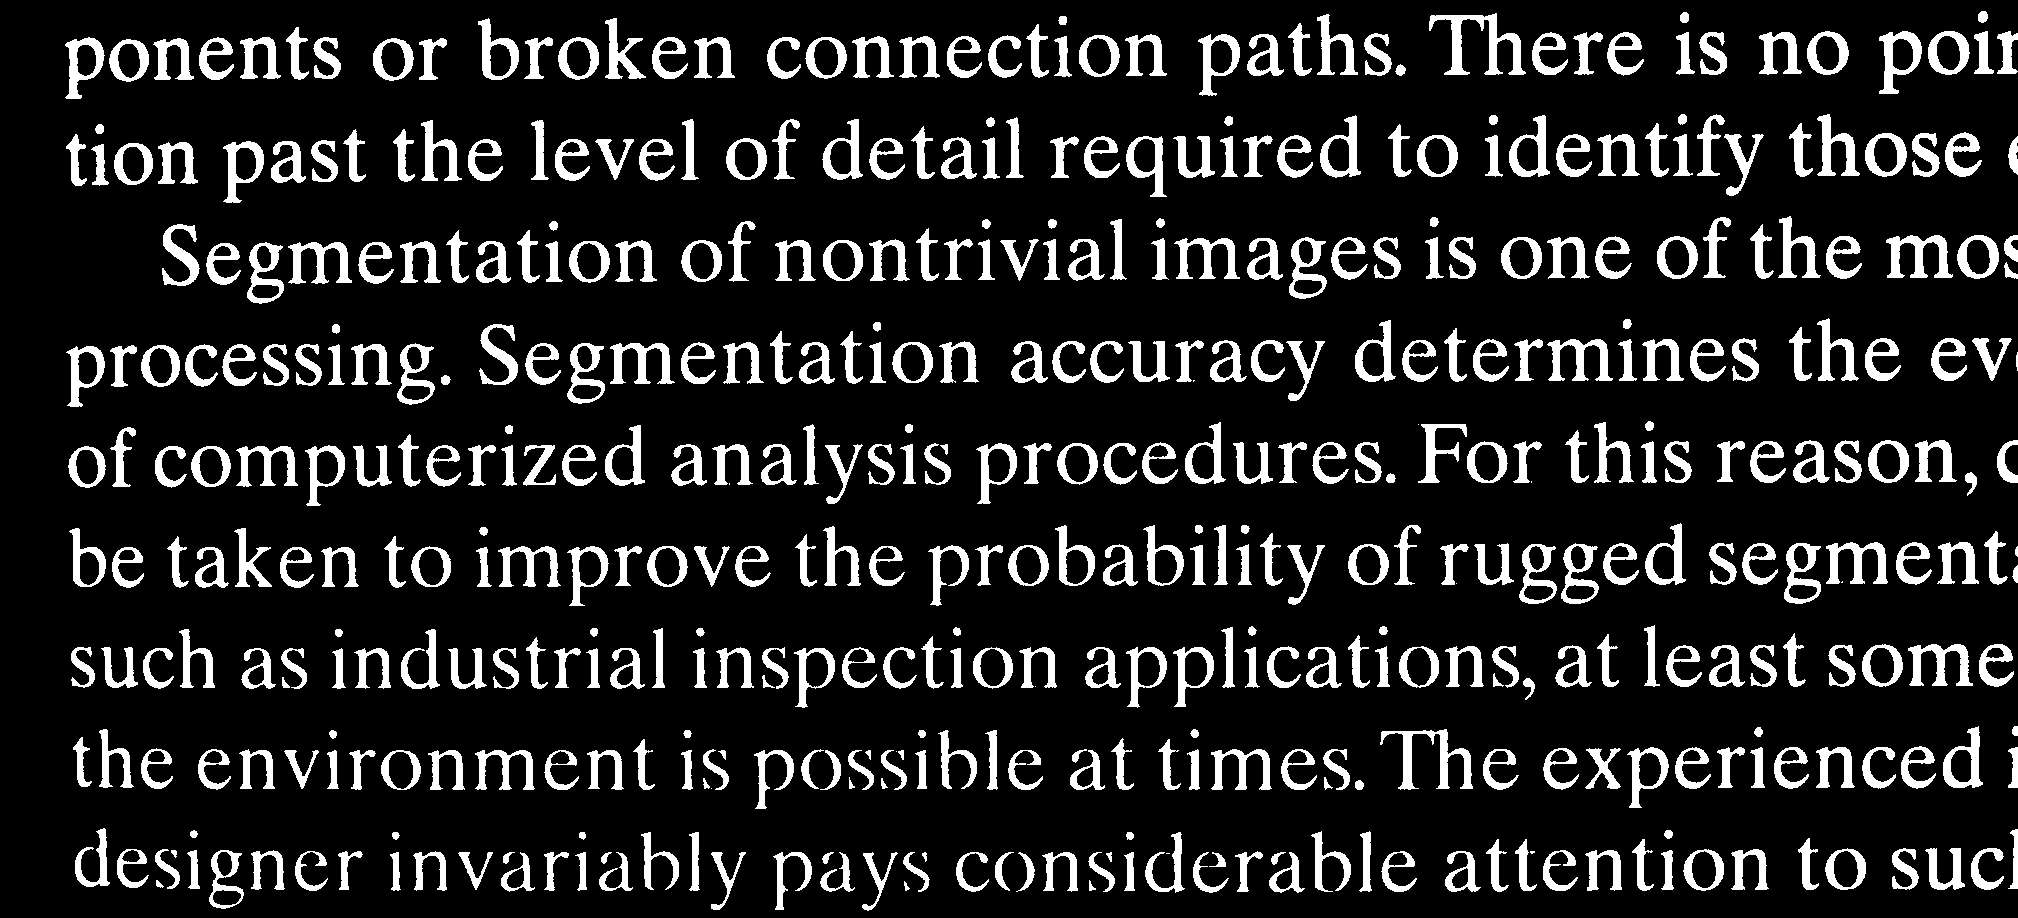

Image height= 918 px, and width= 2018 px and data type: uint8


In [ ]:
# load and display the sample image
image = cv2.imread('text_image.tif', cv2.IMREAD_GRAYSCALE)
cv2_imshow(image)

height, width = image.shape
print("Image height=", height, "px, and width=", width, "px and data type:", image.dtype)

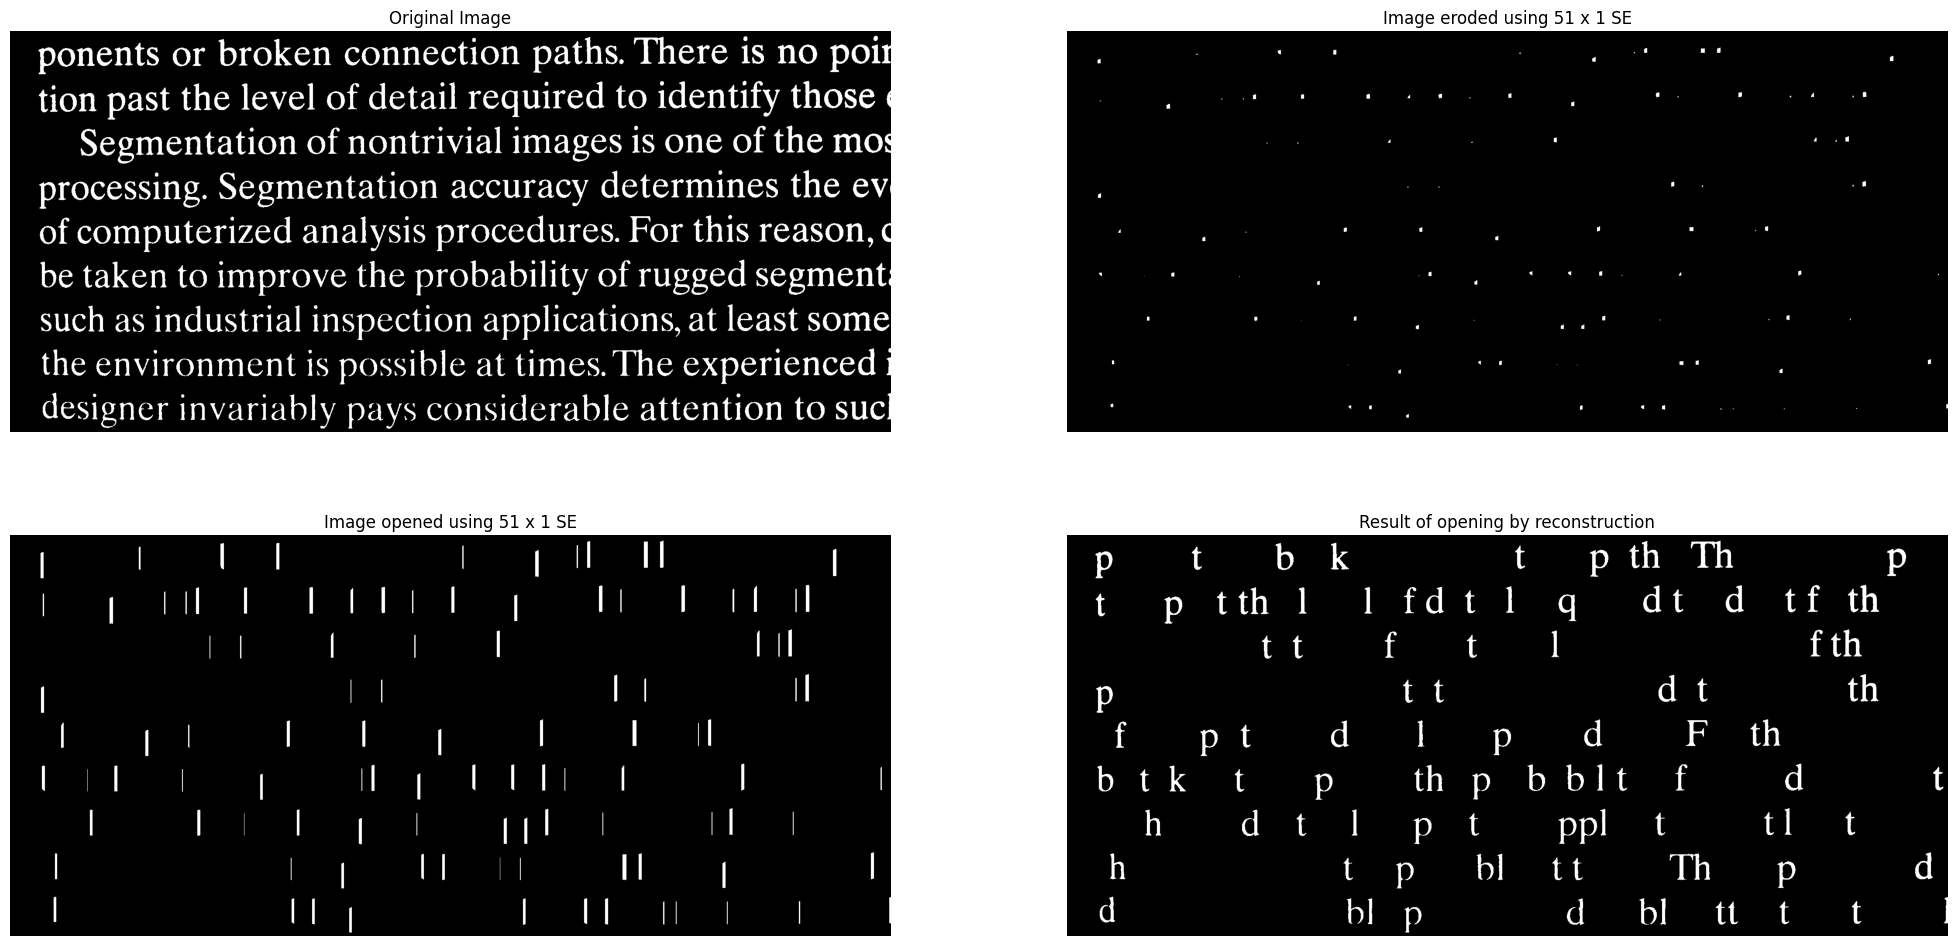

In [ ]:

def opening_by_reconstruction(marker, mask):
    prev_marker = np.zeros_like(marker)
    while True:
        marker = cv2.dilate(marker, np.ones((3, 3), np.uint8))
        marker = np.minimum(marker, mask)
        if np.array_equal(marker, prev_marker):
            break

        prev_marker = marker.copy()

    return marker


kernel = np.ones((51,1), np.uint8)

eroded_image = cv2.erode(image, kernel, iterations=1)

opening_image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

reconstructed_image = opening_by_reconstruction(eroded_image, image)

fig, axs = plt.subplots(2, 2, figsize=(25, 12))

axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title("Original Image")
axs[0, 1].imshow(eroded_image, cmap='gray')
axs[0, 1].set_title("Image eroded using 51 x 1 SE")
axs[1, 0].imshow(opening_image, cmap='gray')
axs[1, 0].set_title("Image opened using 51 x 1 SE")
axs[1, 1].imshow(reconstructed_image, cmap='gray')
axs[1, 1].set_title("Result of opening by reconstruction")

for ax in axs.flat:
    ax.axis('off')

# 7. Skeletonization using thinning

(-0.5, 507.5, 443.5, -0.5)

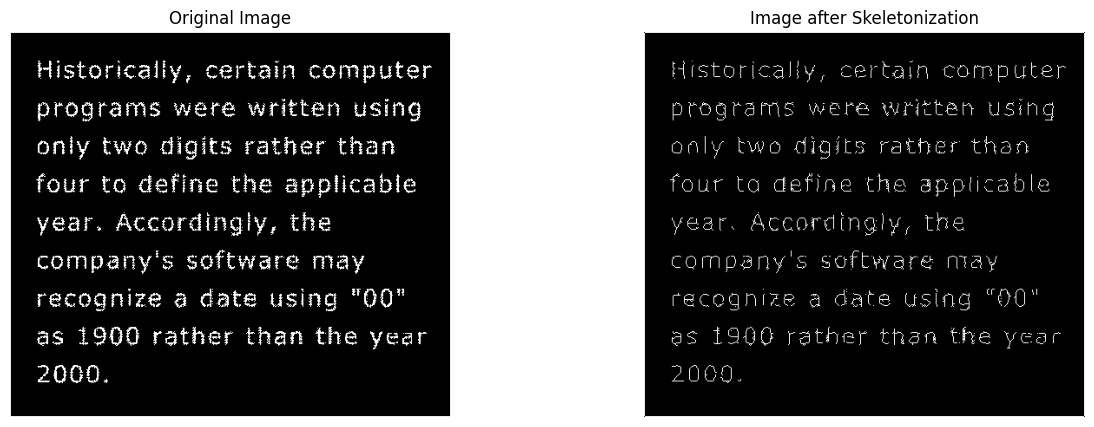

In [ ]:
from skimage.morphology import skeletonize

# load and display the sample image
image = cv2.imread('text_gaps.tif', cv2.IMREAD_GRAYSCALE)

skeleton = skeletonize(image)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(skeleton, cmap='gray')
axes[1].set_title('Image after Skeletonization')
axes[1].axis('off')

# 8. Convex hull

In [ ]:
# download the sample image
!wget --no-check-certificate \
    https://drive.google.com/uc?id=1IbNmxSZ1IK4cmAZnoLLJ3MQGceLjFB1z -O perfectly_painted_cat.png

--2024-10-15 07:25:25--  https://drive.google.com/uc?id=1IbNmxSZ1IK4cmAZnoLLJ3MQGceLjFB1z
Resolving drive.google.com (drive.google.com)... 142.251.111.101, 142.251.111.102, 142.251.111.139, ...
Connecting to drive.google.com (drive.google.com)|142.251.111.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1IbNmxSZ1IK4cmAZnoLLJ3MQGceLjFB1z [following]
--2024-10-15 07:25:25--  https://drive.usercontent.google.com/download?id=1IbNmxSZ1IK4cmAZnoLLJ3MQGceLjFB1z
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.179.132, 2607:f8b0:4004:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.179.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6172 (6.0K) [image/png]
Saving to: ‘perfectly_painted_cat.png’

perfectly_painted_c 100%[===================>]   6.03K  --.-KB/s    in 0s      

2024-10-15 07:25:28 (37.1 MB/s) 

Image height= 119 px, and width= 120 px and data type: uint8


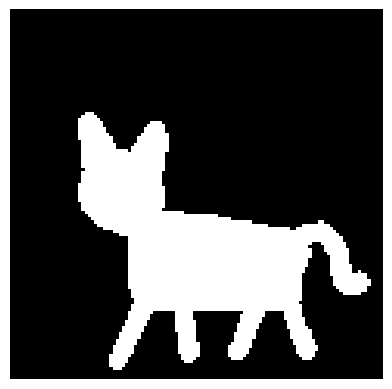

In [ ]:
# Read the image in grayscale mode using OpenCV library
input = cv2.imread('perfectly_painted_cat.png', cv2.IMREAD_GRAYSCALE)

# Get the height and width of the image
(height, width) = input.shape

# Apply thresholding to create a binary image
_, image = cv2.threshold(input, 128, 1, cv2.THRESH_BINARY)

# Print information about the image
print("Image height=", height, "px, and width=", width, "px and data type:", image.dtype)

# Display the binary image using Matplotlib
plt.imshow(image,'gray')
plt.axis('off')
plt.show()

In [ ]:
# Define 4 3x3 binary matrixes that will be used as SE and 1 matrix that represents background

B1 = np.array([[1, 0, 0],
              [1, 0, 0],
              [1, 0, 0]])

B2 = np.array([[1, 1, 1],
              [0, 0, 0],
              [0, 0, 0]])

B3 = np.array([[0, 0, 1],
              [0, 0, 1],
              [0, 0, 1]])

B4 = np.array([[0, 0, 0],
              [0, 0, 0],
              [1, 1, 1]])

Bg = np.array([[0,0,0],
              [0,1,0],
              [0,0,0]])

In [ ]:
def erosion(image, se):
  # Create an array of zeros with the same shape as the input image
  result = np.zeros_like(image)

  # Get the number of rows and columns in the structuring element (se)
  se_rows, se_cols = se.shape

  # Get the number of rows and columns in the input image
  img_rows, img_cols = image.shape

  # Iterate the SE over the input image
  for row in range(img_rows - se_rows + 1):
      for col in range(img_cols - se_cols + 1):

        # Extract the region of interest from the input image
          region = image[row:row + se_rows, col:col + se_cols]

          # Check if the structuring element matches the region
          if np.all(region[se == 1]):
            # If all elements in the region where the structuring element is 1 are 1,
            # set the central pixel in the result image to 1
            result[row + se_rows // 2, col + se_cols // 2] = 1

  # Return the result of erosion
  return result



In [ ]:
def hit_or_miss(image, Bi, Bg):
  # Perform erosion on the input image with structuring element Bi
    erosion_bi = erosion(image,Bi)

    # Perform erosion on the complement of the input image with structuring element Bg
    erosion_bg = erosion(~image,Bg)

    # Use logical AND to combine the results of the two erosions
    result = np.logical_and(erosion_bi.astype(bool), erosion_bg.astype(bool)).astype(int)

    # Return the result of the hit-or-miss operation
    return result

In [ ]:
def thickening(hitmissresult, image):
  # Use logical OR to combine the hit-or-miss result and the original image
    result = np.logical_or(hitmissresult.astype(bool), image.astype(bool)).astype(int)

    # Return the result of thickening
    return result

In [ ]:
def union(image1, image2):
  # Use logical OR to combine the two input images
    result = np.logical_or(image1.astype(bool), image2.astype(bool)).astype(int)

    # Return the result of the union operation
    return result

In [ ]:
def intersection(image1, image2):
   #Use logical AND to find the common pixels between the two input images
    result = np.logical_and(image1.astype(bool), image2.astype(bool)).astype(int)

    # Return the result of the intersection operation
    return result

In [ ]:
def convex_loop(image,Bi,Bg):
    # Initialize hit-or-miss result using the input image
    hitmissresult = hit_or_miss(image,Bi,Bg)

    # Initialize thickening using the hit-or-miss result and the original image
    bi_thickening = thickening(image, hitmissresult)

    # Save a copy of the image before thickening for comparison in the loop
    old_bi_thickening = image

    # Iterate until the thickening result no longer changes
    while not np.array_equal(old_bi_thickening, bi_thickening):
        # Update the before thickening  field
        old_bi_thickening = np.copy(bi_thickening)

        # Perform hit-or-miss on the current thickening result
        hitmissresult = hit_or_miss(bi_thickening, Bi, Bg)

        # Update thickening using the new hit-or-miss result
        bi_thickening = thickening(bi_thickening, hitmissresult)

    # Return the final convex hull obtained through iteration
    return bi_thickening

In [ ]:
def convex_hull(image,B1,B2,B3,B4,Bg):

    # Compute thickening using convex_loop for each structuring element
    b1_thickening_image=convex_loop(image,B1,Bg)
    b2_thickening_image=convex_loop(image,B2,Bg)
    b3_thickening_image=convex_loop(image,B3,Bg)
    b4_thickening_image=convex_loop(image,B4,Bg)

    # Combine the thickening results using union operations
    union1 = union(b1_thickening_image, b2_thickening_image)
    union2 = union(b3_thickening_image, b4_thickening_image)
    union3 = union(union1, union2)

    # Find the bounding box of the original binary image
    minrow, maxrow = float('inf'), 0
    mincol, maxcol = float('inf'), 0

    # Create a temporary array to store the bounding box
    temp= np.zeros(image.shape)

     # Iterate over each pixel in the original binary image
    for row in range(image.shape[0]):
        for col in range(image.shape[1]):
          # If the pixel is part of the object (value is 1)
            if image[row, col] == 1:
                minrow = min(minrow, row)
                maxrow = max(maxrow, row)
                mincol = min(mincol, col)
                maxcol = max(maxcol, col)

    # Set the pixels inside the bounding box to 1 in the temporary array
    temp[minrow:maxrow+1, mincol:maxcol+1] = 1

    # Compute the intersection of the unioned thickening result and the bounding box
    result = intersection(union3, temp)
    return result

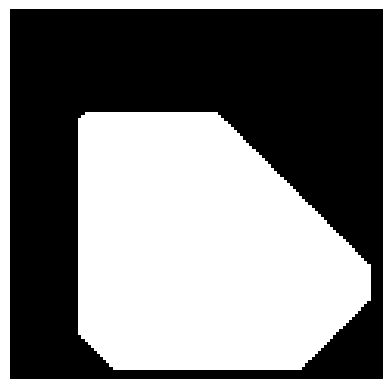

In [ ]:
# Obtain the convex hull of the input binary image using specific structuring elements
final_image=convex_hull(image,B1,B2,B3,B4,Bg)
# Display the resulting convex hull using Matplotlib
plt.imshow(final_image, cmap='gray')
plt.axis('off')
plt.show()